In [1]:
import numpy as np
import random
from copy import deepcopy
import matplotlib.pyplot as plt
import torchvision, cv2
from utils.visualizations import *
from utils.transforms import *
import utils.dataset as ds

In [17]:
import utils.dataset as ds
import importlib
importlib.reload(ds)

ds.SLPDataset.reload_data_from_source()
ds.PhysionetDataset.reload_data_from_source()

<module 'utils.dataset' from 'c:\\Users\\Jannis\\Development\\wisemat-posture-classification\\utils\\dataset.py'>

In [ ]:
import utils.dataset as ds
import importlib
importlib.reload(ds)

physionet = ds.PhysionetDataset(train=True)
slp = ds.SLPDataset()

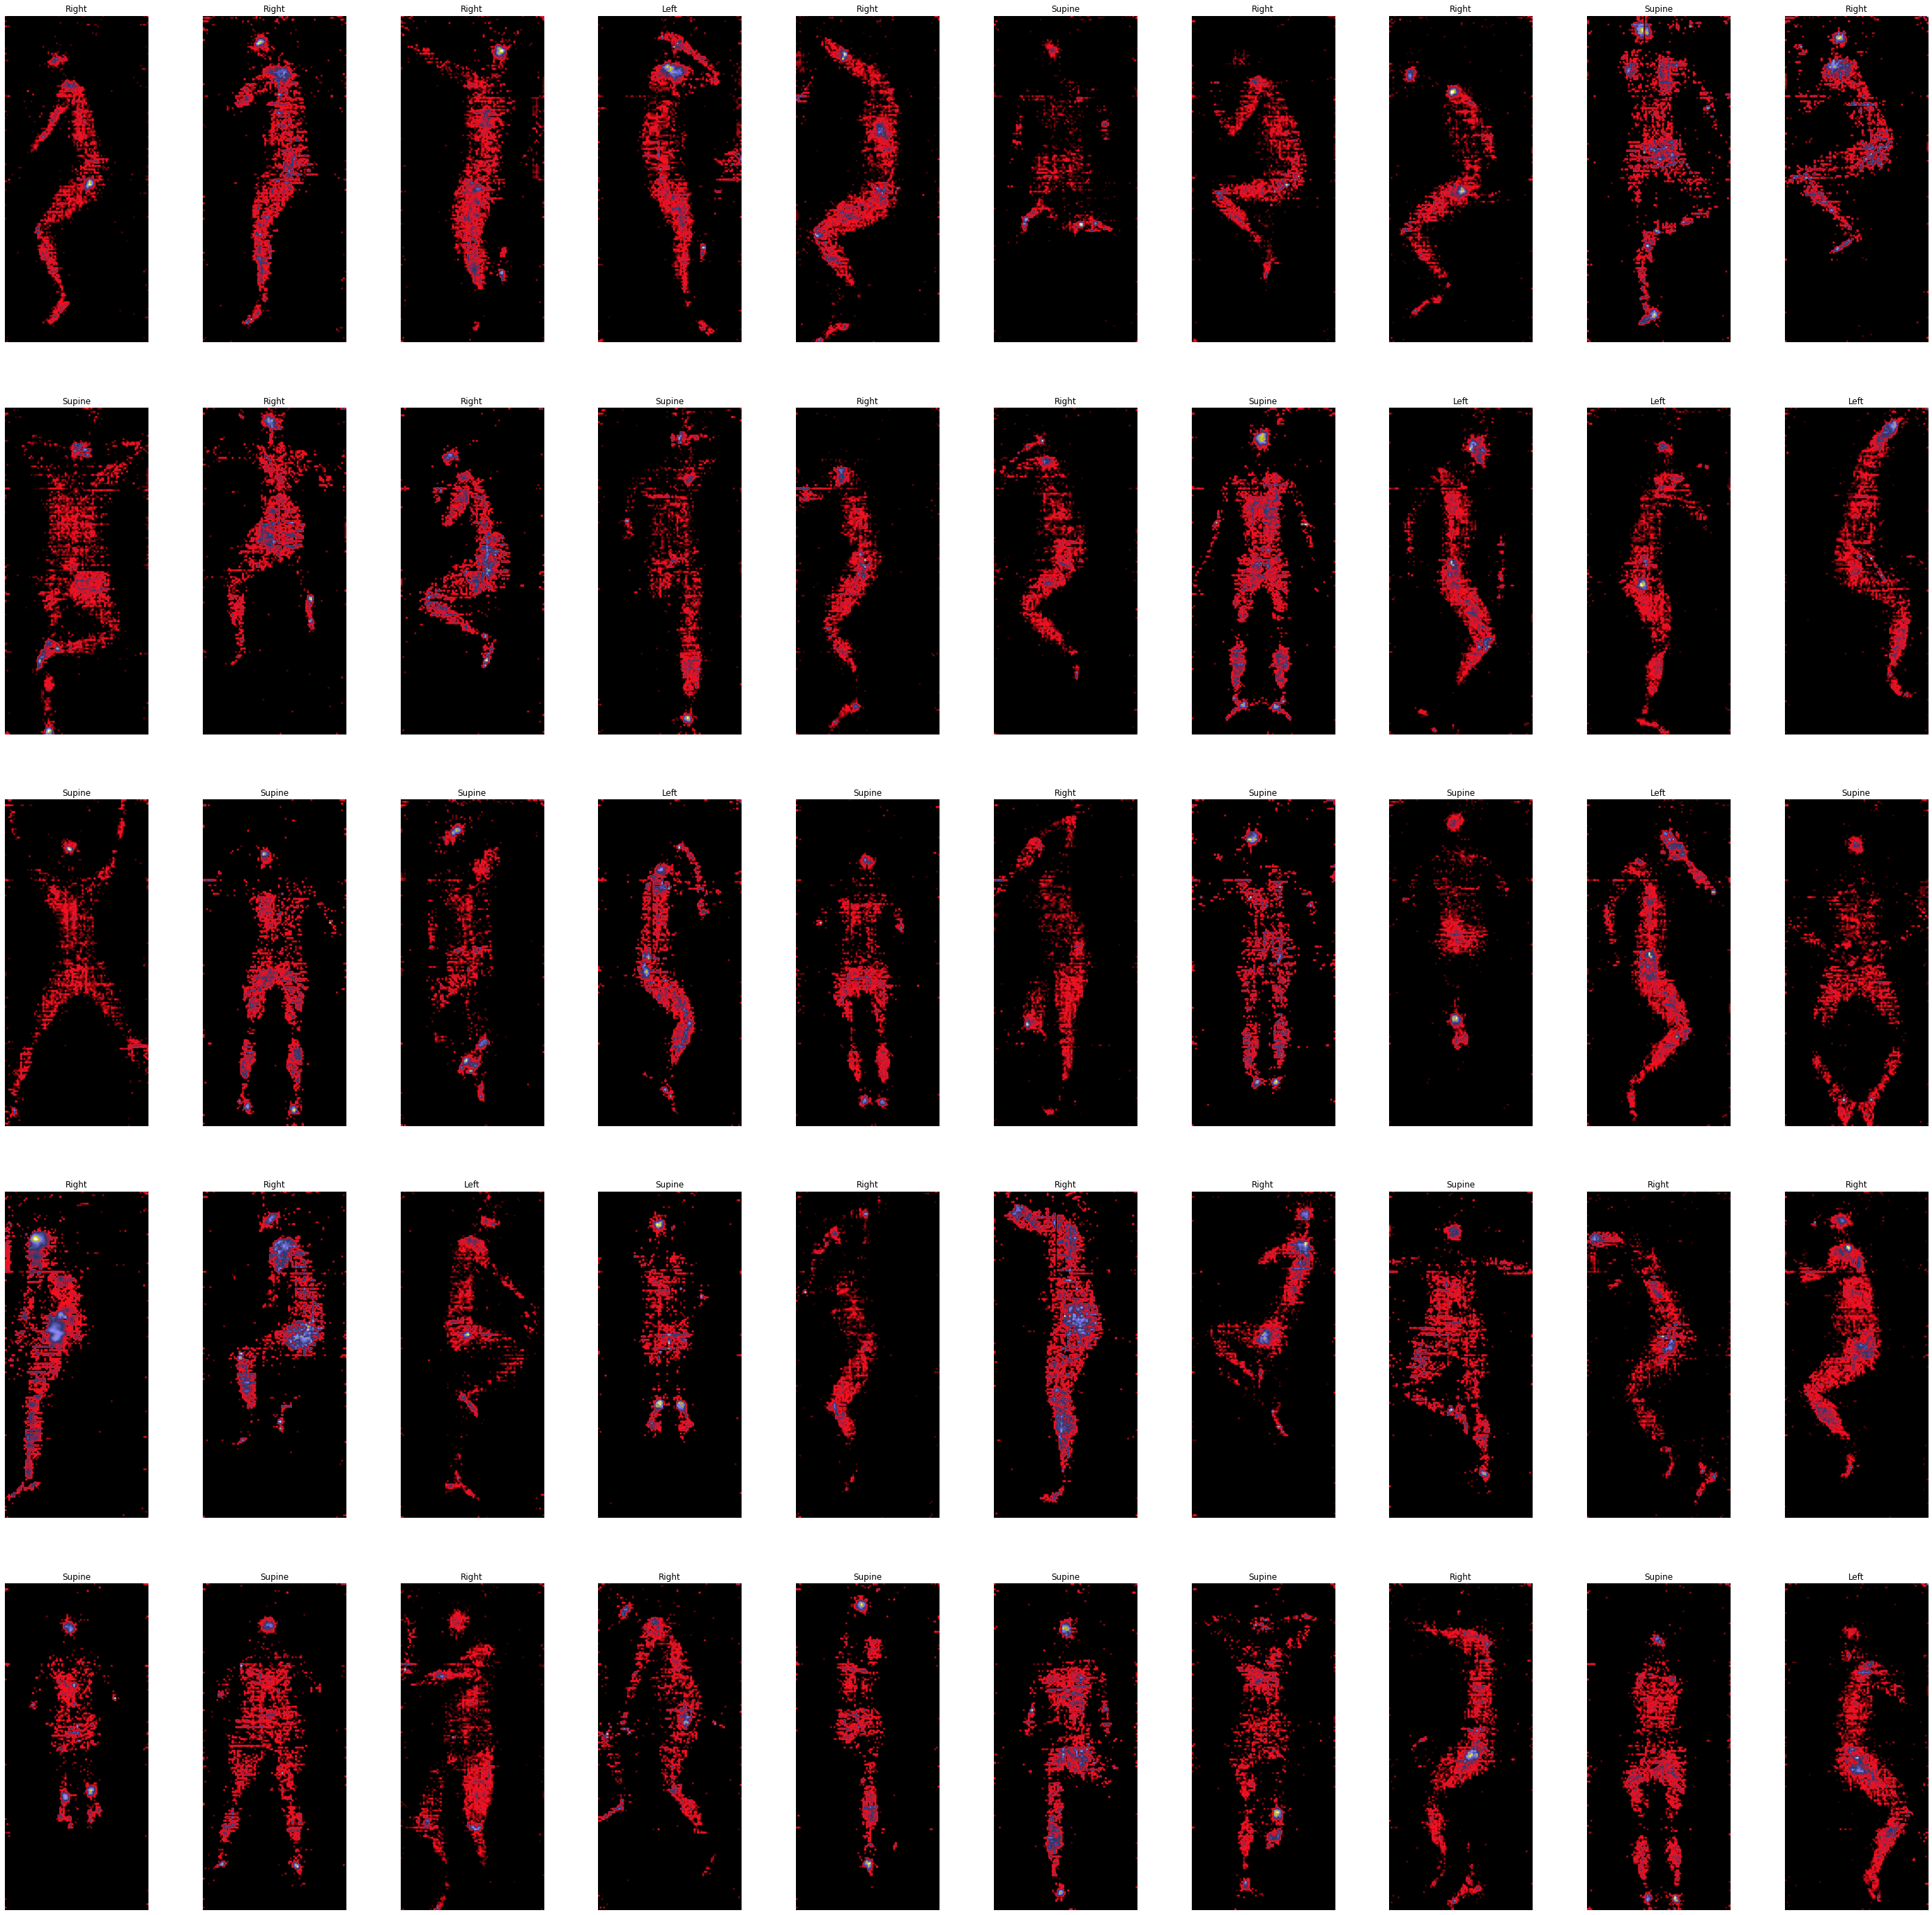

In [21]:
from utils.transforms import *
from utils.visualizations import *
import utils.transforms as tf
import utils.visualizations as vi
import importlib
importlib.reload(tf)
importlib.reload(vi)

nsamples = 50
sample_indices = random.sample(range(0, len(slp)), nsamples)
plot_samples_matrix(list(map(lambda i: (slp[i][0], slp.classes[slp[i][1]]), sample_indices)))

In [22]:
plot_image(physionet[0][0])

NameError: name 'physionet' is not defined

| Index | Joint          |
|-------|----------------|
| 0     | Right Ankle    |
| 1     | Right Knee     |
| 2     | Right Hip      |
| 3     | Left Hip       |
| 4     | Left Knee      |
| 5     | Left Ankle     |
| 6     | Right Wrist    |
| 7     | Right Elbow    |
| 8     | Right Shoulder |
| 9     | Left Shoulder  |
| 10    | Left Elbow     |
| 11    | Left Wrist     |
| 12    | Thorax         |
| 13    | Head Top       |

In [ ]:
import scipy.io
from enum import IntEnum

X = 0
Y = 1

class JointIndex(IntEnum):
    RIGHTANKLE = 0
    RIGHTKNEE = 1
    RIGHTHIP = 2
    LEFTHIP=3
    LEFTKNEE=4
    LEFTANKLE=5
    RIGHTWRIST=6
    RIGHTELBOW=7
    RIGHTSHOULDER=8
    LEFTSHOULDER=9
    LEFTELBOW=10
    LEFTWRIST=11
    THORAX=12
    HEADTOP=13  

mat = scipy.io.loadmat('SLP/danaLab/00001/joints_gt_IR.mat')
skelli = mat["joints_gt"]

skelli = skelli[:2, :, 30]
skelli = np.swapaxes(skelli, axis1=0, axis2=1)
print(skelli)
print(skelli.shape)

supine_hip_width = 15
supine_shoulder_width = 20

hip_is_thin = abs(skelli[JointIndex.LEFTHIP][X] - skelli[JointIndex.RIGHTHIP][X]) < supine_hip_width
shoulder_is_thin = abs(skelli[JointIndex.LEFTSHOULDER][X] - skelli[JointIndex.RIGHTSHOULDER][X]) < supine_shoulder_width
right_arm_pointing_right = skelli[JointIndex.RIGHTSHOULDER][X] < skelli[JointIndex.RIGHTWRIST][X]
left_arm_pointing_right = skelli[JointIndex.LEFTSHOULDER][X] < skelli[JointIndex.LEFTWRIST][X]

print(hip_is_thin)
print(shoulder_is_thin)
print(right_arm_pointing_right)
print(left_arm_pointing_right)